In [96]:
!dir

In [1]:
import findspark
findspark.init()

In [2]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

spark=SparkSession.builder \
.master ("local[*]")\
.appName("week4")\
.getOrCreate()
sc=spark.sparkContext
sqlContext=SQLContext(sc)

C:\apps\spark-3.3.0-bin-hadoop3\python\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [103]:
df = spark.read.options(header = 'True',inferSchema='True',delimiter=';').csv("XYZ_Bank_Deposit_Data_Classification.csv")

In [104]:
df.show(1)

+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married| basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
only showing top 1 r

In [105]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [106]:
df.show(20,False)

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|job        |marital |education          |default|housing|loan|contact  |month|day_of_week|duration|campaign|pdays|previous|poutcome   |emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|y  |
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|56 |housemaid  |married |basic.4y           |no     |no     |no  |telephone|may  |mon        |261     |1       |999  |0       |nonexistent|1.1         |93.994        |-36.4        |4.857    |5191.0     |no |
|57 |services   |married |high.school        |unknown|no     |no  |telephone|may  |mon        |149     |1       |999  |0       |nonexistent|1.1         |93.994     

In [107]:
df.head(1)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no')]

##### Counting Number of Rows 

In [108]:
df.count()

41188

In [109]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [110]:
# Get row count
rows = df.count()
print(f"DataFrame Rows count : {rows}")

# Get columns count
cols = len(df.columns)
print(f"DataFrame Columns count : {cols}")

DataFrame Rows count : 41188
DataFrame Columns count : 21


In [111]:
from pyspark.sql.functions import col
df = df.select(
     col('age'),
     col('job'),
     col('marital'),
     col('education'),
     col('default'),
     col('housing'),
     col('loan'),
     col('contact'),
     col('month'),
     col('day_of_week'),
     col('duration'),
     col('campaign'),
     col('pdays'),
     col('previous'),
     col('poutcome'),
     col('`emp.var.rate`').alias('emp_var_rate'), 
     col('`cons.price.idx`').alias('cons_price_idx'),
     col('`cons.conf.idx`').alias('cons_conf_idx'),
     col('euribor3m'),
     col('`nr.employed`').alias('nr_employed'),
     col('y')
)

In [112]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [113]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



#### Count Null in each Column

In [114]:
for col in df.columns:
    print(col, "with null values: ", df.filter(df[col].isNull()).count())

age with null values:  0
job with null values:  0
marital with null values:  0
education with null values:  0
default with null values:  0
housing with null values:  0
loan with null values:  0
contact with null values:  0
month with null values:  0
day_of_week with null values:  0
duration with null values:  0
campaign with null values:  0
pdays with null values:  0
previous with null values:  0
poutcome with null values:  0
emp_var_rate with null values:  0
cons_price_idx with null values:  0
cons_conf_idx with null values:  0
euribor3m with null values:  0
nr_employed with null values:  0
y with null values:  0


In [115]:
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])

### Getting Unique Columns for Categorical Variables

In [118]:
from pyspark.sql.types import StringType, DoubleType

In [119]:
# get string
str_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, StringType)]

# or double
dbl_cols = [f.name for f in df.schema.fields if isinstance(f.dataType, DoubleType)]


In [120]:
#str_cols.remove('y')
str_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [121]:
int_list = [t[0] for t in df.dtypes if t[1] == 'int']

In [122]:
num_cols = dbl_cols + int_list

In [123]:
for val in str_cols:
    print(df.groupBy(val).count().show())

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2924|
|      retired| 1720|
|      unknown|  330|
|self-employed| 1421|
|      student|  875|
|  blue-collar| 9254|
| entrepreneur| 1456|
|       admin.|10422|
|   technician| 6743|
|     services| 3969|
|    housemaid| 1060|
|   unemployed| 1014|
+-------------+-----+

None
+--------+-----+
| marital|count|
+--------+-----+
| unknown|   80|
|divorced| 4612|
| married|24928|
|  single|11568|
+--------+-----+

None
+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 9515|
|            unknown| 1731|
|           basic.6y| 2292|
|professional.course| 5243|
|  university.degree|12168|
|         illiterate|   18|
|           basic.4y| 4176|
|           basic.9y| 6045|
+-------------------+-----+

None
+-------+-----+
|default|count|
+-------+-----+
|unknown| 8597|
|     no|32588|
|    yes|    3|
+-------+-----+

None
+-------+-----+
|housing|count|
+-------

In [124]:
 #!pip install pyspark_dist_explore

In [125]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

In [126]:
df.head()

Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp_var_rate=1.1, cons_price_idx=93.994, cons_conf_idx=-36.4, euribor3m=4.857, nr_employed=5191.0, y='no')

### EDA: Distribution of variables

(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <BarContainer object of 10 artists>)

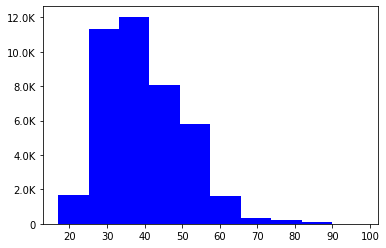

In [127]:
fig, ax = plt.subplots()
hist(ax, df.select('age'), bins = 10, color=['blue'])

In [128]:
def pie_chart(df, col):
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    pd_df = classes.toPandas()
    pd_df.plot(kind='pie', x=col, y='count', labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()

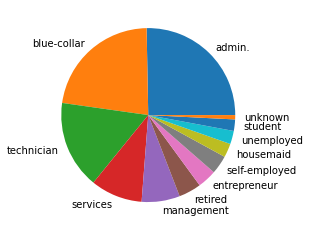

In [129]:
pie_chart(df, 'job')

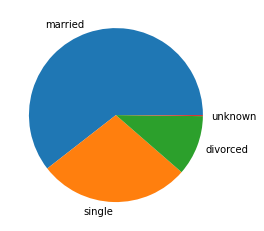

In [130]:
pie_chart(df, 'marital')

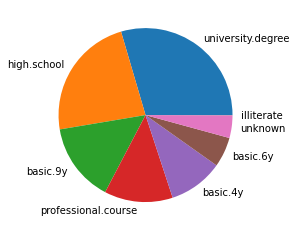

In [131]:
pie_chart(df, 'education')

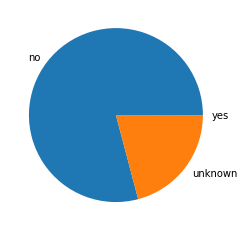

In [132]:
pie_chart(df, 'default')

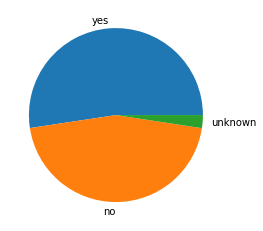

In [133]:
pie_chart(df, 'housing')

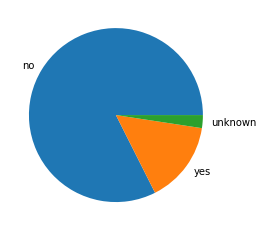

In [134]:
pie_chart(df, 'loan')

In [137]:
df.select(num_cols).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
emp_var_rate,41188,0.08188550063178966,1.57095974051703,-3.4,1.4
cons_price_idx,41188,93.5756643682899,0.5788400489540823,92.201,94.767
cons_conf_idx,41188,-40.502600271918276,4.628197856174573,-50.8,-26.9
euribor3m,41188,3.621290812858533,1.7344474048512595,0.634,5.045
nr_employed,41188,5167.035910943957,72.25152766826338,4963.6,5228.1
age,41188,40.02406040594348,10.421249980934043,17,98
duration,41188,258.2850101971448,259.27924883646455,0,4918
campaign,41188,2.567592502670681,2.770013542902331,1,56
pdays,41188,962.4754540157328,186.910907344741,0,999


In [138]:
df.stat.corr('pdays', 'duration')

-0.047577015445611326

In [139]:
df.stat.corr('campaign', 'duration')

-0.07169922626415307

In [140]:
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest

In [141]:
assembler = VectorAssembler(
    inputCols=['col2', 'col3', 'col4'],
    outputCol="vector_features")

In [144]:
numeric_data = df.select(num_cols).toPandas()

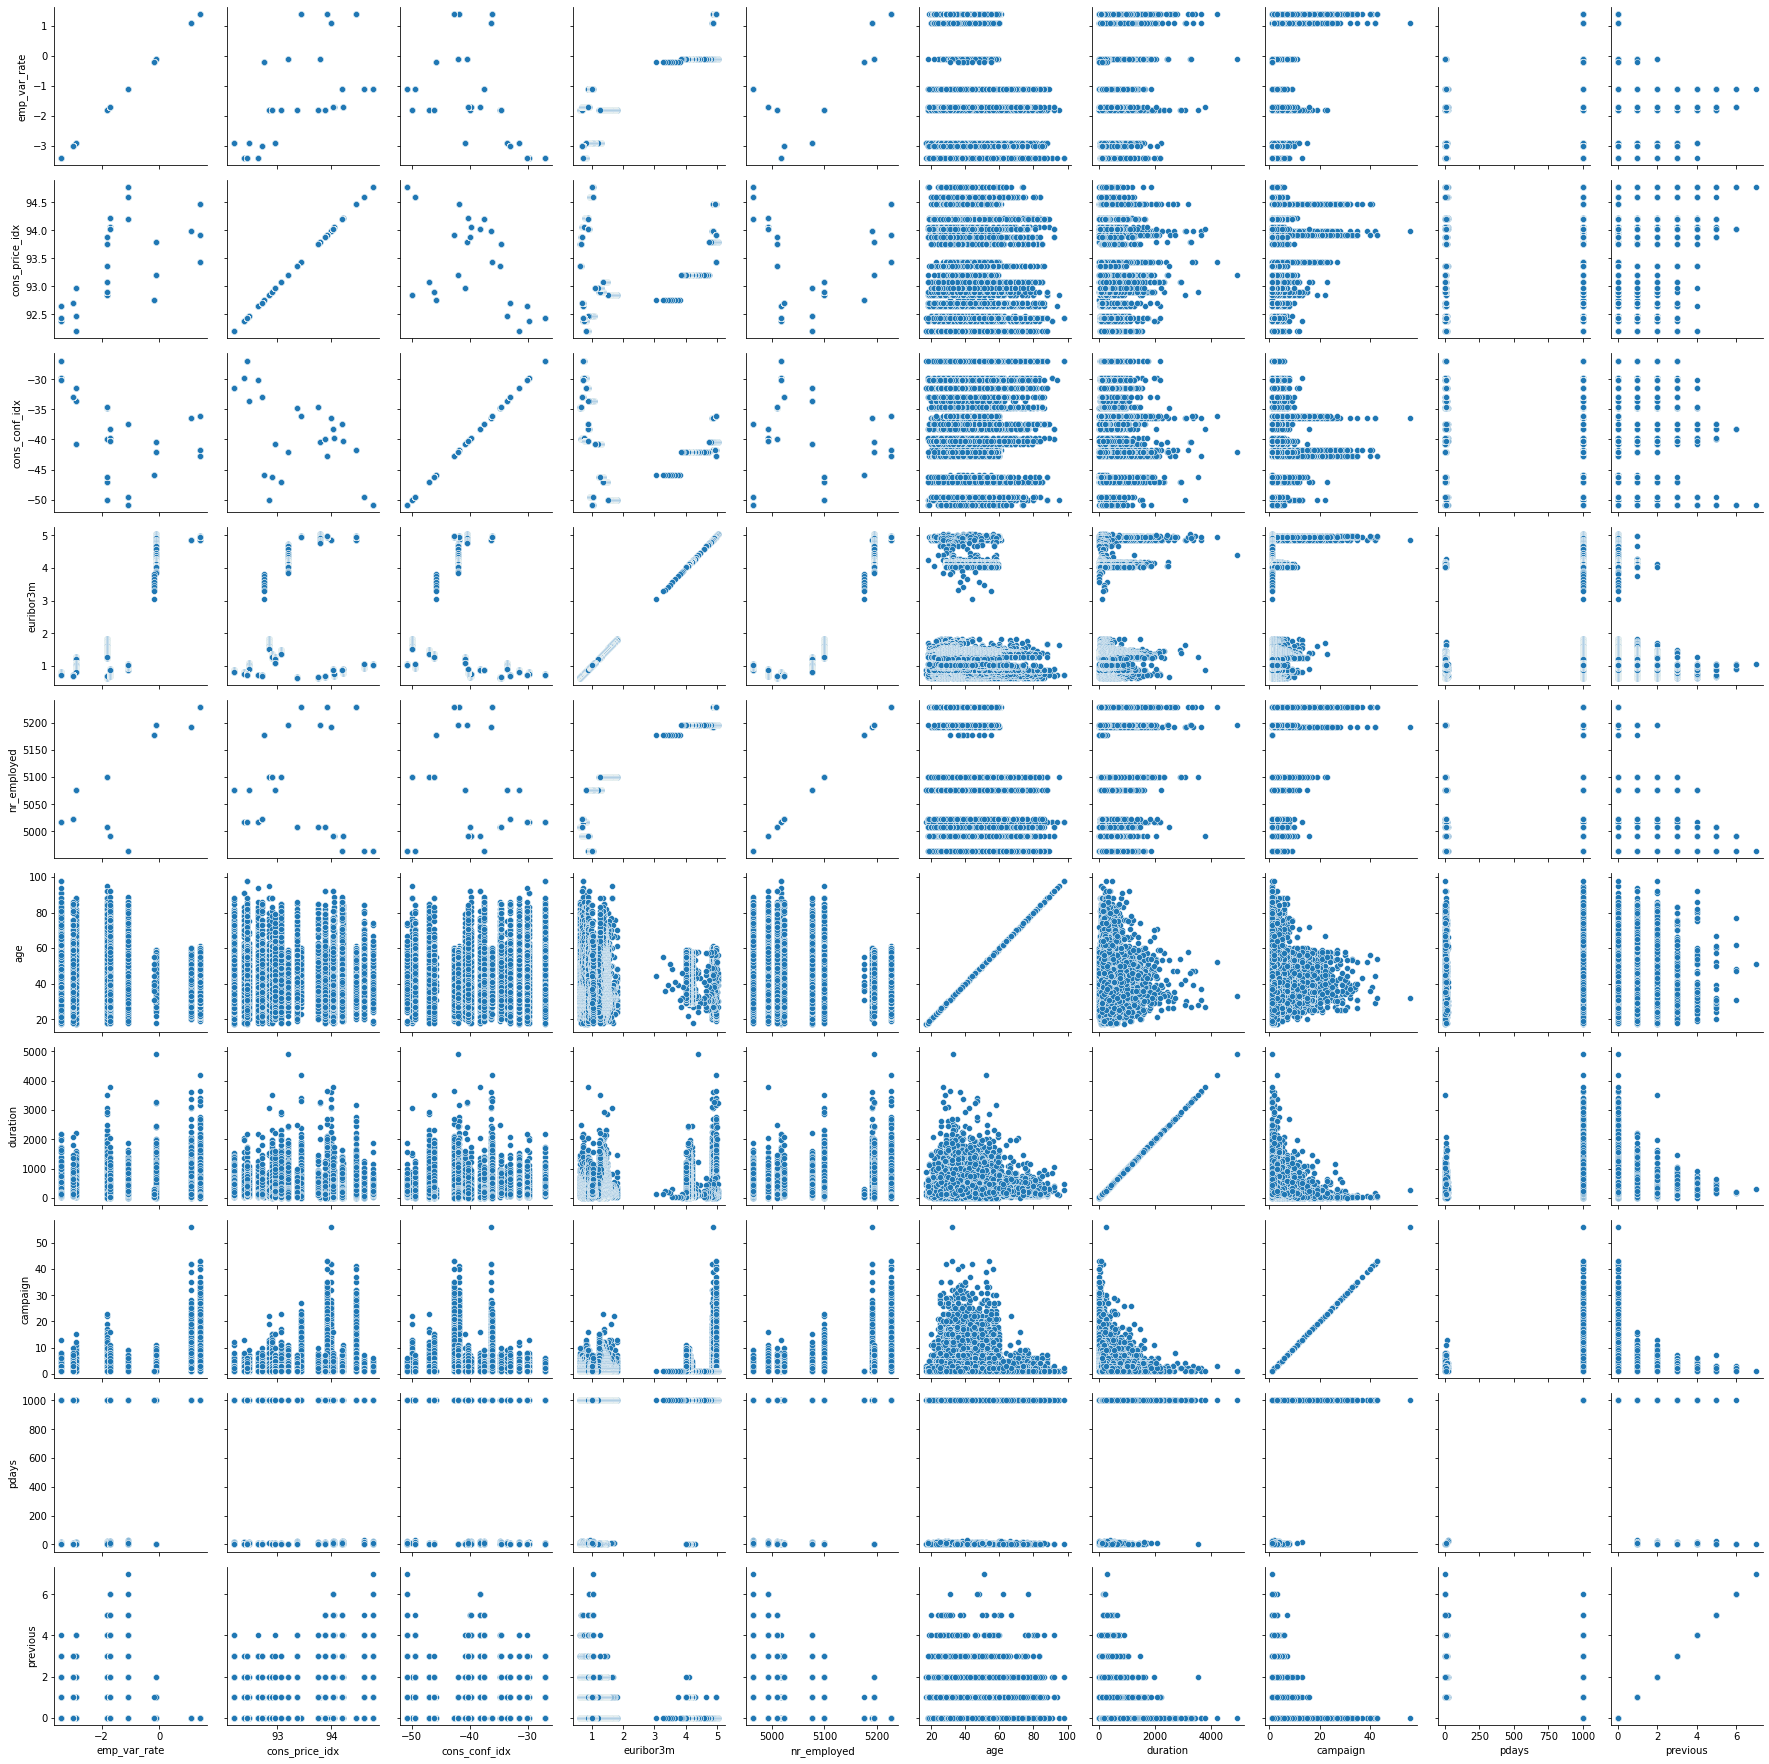

In [145]:
g = sns.PairGrid(numeric_data)
g.map(sns.scatterplot)

In [146]:
df.show(1)

+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married| basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
only showing top 1 r

### Vectorizing categorical variables into ingestible features

In [147]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import confusion_matrix

In [148]:
data = df.drop(*['month','day_of_week'])

In [149]:
data.show(1)

+---+---------+-------+---------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|education|default|housing|loan|  contact|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---------+-------+---------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married| basic.4y|     no|     no|  no|telephone|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
+---+---------+-------+---------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
only showing top 1 row



In [150]:
#Preprocessing steps
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# create object of StringIndexer class and specify input and output column
Index_job = StringIndexer(inputCol='job',outputCol='job_Index')
Index_marital = StringIndexer(inputCol='marital',outputCol='marital_Index')
Index_education = StringIndexer(inputCol='education',outputCol='education_Index')
Index_default = StringIndexer(inputCol='default',outputCol='default_Index')
Index_housing = StringIndexer(inputCol='housing',outputCol='housing_Index')
Index_loan = StringIndexer(inputCol='loan',outputCol='loan_Index')
Index_contact = StringIndexer(inputCol='contact',outputCol='contact_Index')
Index_poutcome = StringIndexer(inputCol='poutcome',outputCol='poutcome_Index')
Index_y = StringIndexer(inputCol='y',outputCol='y_Index')


# transform the data
data = Index_job.fit(data).transform(data)
data = Index_marital.fit(data).transform(data)
data = Index_education.fit(data).transform(data)
data = Index_default.fit(data).transform(data)
data = Index_housing.fit(data).transform(data)
data = Index_loan.fit(data).transform(data)
data = Index_contact.fit(data).transform(data)
data = Index_poutcome.fit(data).transform(data)
data = Index_y.fit(data).transform(data)

In [151]:
# create object and specify input and output column
OHE = OneHotEncoder(inputCols=['job_Index', 'marital_Index','education_Index','default_Index','housing_Index','loan_Index','contact_Index', 'poutcome_Index','y_Index'],outputCols=['job_OHE', 'marital_OHE','education_OHE','default_OHE','housing_OHE','loan_OHE', 'contact_OHE','poutcome_OHE','y_OHE'])

# transform the data
my_data = OHE.fit(data).transform(data)

In [152]:
my_data.show(1)

+---+---------+-------+---------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+--------------+-------+--------------+-------------+-------------+-------------+-------------+-------------+-----------+-------------+-------------+
|age|      job|marital|education|default|housing|loan|  contact|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_Index|marital_Index|education_Index|default_Index|housing_Index|loan_Index|contact_Index|poutcome_Index|y_Index|       job_OHE|  marital_OHE|education_OHE|  default_OHE|  housing_OHE|     loan_OHE|contact_OHE| poutcome_OHE|        y_OHE|
+---+---------+-------+---------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-

In [153]:
df.show(1)

+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married| basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
+---+---------+-------+---------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
only showing top 1 r

In [154]:
num_cols

['emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [155]:
from pyspark.ml.feature import VectorAssembler

# specify the input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=['age',
                                       'job_Index',
                                       'marital_Index',
                                       'education_Index',
                                       'default_Index',
                                       'housing_Index',
                                       'loan_Index',
                                       'contact_Index',
                                       'duration',
                                       'campaign',
                                       'pdays',
                                       'previous',
                                       'poutcome_Index',
                                       'emp_var_rate',
                                       'cons_price_idx',
                                       'cons_conf_idx',
                                       'euribor3m', 
                                       'nr_employed',
                                       'job_OHE',
                                       'marital_OHE',
                                       'education_OHE',
                                       'default_OHE',
                                       'housing_OHE',
                                       'loan_OHE',
                                       'contact_OHE',
                                       'poutcome_OHE'],
                           outputCol='features')


# transform the data
final_data = assembler.transform(my_data)

In [156]:
# view the transformed vector
final_data.select('features','y_Index').show()

+--------------------+-------+
|            features|y_Index|
+--------------------+-------+
|(48,[0,1,3,5,7,8,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,3,5,7,8,9,...|    0.0|
|(48,[0,1,3,5,6,7,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,3,5,7,8,9,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,2,3,5,6,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,1,3,4,6,7,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,1,3,4,6,7,...|    0.0|
|(48,[0,1,3,6,7,8,...|    0.0|
|(48,[0,1,2,3,4,5,...|    0.0|
+--------------------+-------+
only showing top 20 rows



### Correlation and Chi-square analysis

In [157]:
feature_test_results = ChiSquareTest.test(final_data, "features", "y_Index").head()
print("pValues: " + str(feature_test_results.pValues))

pValues: [0.0,0.0,0.0,0.0,0.0,0.05829447669453458,0.5786752870441754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7958523557126682e-10,0.0,0.21208390053776316,5.549105619451211e-11,0.9322555609751922,0.0,0.0007305570245542681,0.34401832680287325,0.1867800146386014,0.0027546177401764904,0.0,0.0,0.0,0.031327762845843043,0.0,0.1304144062380882,0.0,0.8386716720814029,0.028420477500497476,1.8177995960710902e-06,1.3663850912282172e-05,0.0,0.0,0.01716244660145938,0.02446712799979278,0.29847266019312335,0.3647290379789645,0.0,0.0,1.0929757099376047e-10]


In [158]:
final_data.select('features','y_Index').show()

+--------------------+-------+
|            features|y_Index|
+--------------------+-------+
|(48,[0,1,3,5,7,8,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,3,5,7,8,9,...|    0.0|
|(48,[0,1,3,5,6,7,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,3,5,7,8,9,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,3,4,5,7,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,2,3,5,6,...|    0.0|
|(48,[0,1,2,3,7,8,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,1,3,4,6,7,...|    0.0|
|(48,[0,1,3,7,8,9,...|    0.0|
|(48,[0,1,3,4,6,7,...|    0.0|
|(48,[0,1,3,6,7,8,...|    0.0|
|(48,[0,1,2,3,4,5,...|    0.0|
+--------------------+-------+
only showing top 20 rows



In [159]:
df = final_data.select('features')

In [160]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

In [161]:
# correlation will be in Dense Matrix
correlation = Correlation.corr(df,"features","pearson").collect()[0][0]

# To convert Dense Matrix into DataFrame
rows = correlation.toArray().tolist()
df = spark.createDataFrame(rows,final_data.columns)

In [162]:
df_new = df.toPandas()

In [169]:
df_new =df_new.drop(columns=['job_Index', 'marital_Index', 'education_Index',
       'default_Index', 'housing_Index', 'loan_Index', 'contact_Index',
       'poutcome_Index', 'y_Index', 'job_OHE', 'marital_OHE', 'education_OHE',
       'default_OHE', 'housing_OHE', 'loan_OHE', 'contact_OHE', 'poutcome_OHE',
       'y_OHE', 'features', '_39', '_40', '_41', '_42', '_43', '_44', '_45',
       '_46', '_47', '_48'])

In [209]:
df_new['col']= ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed']

In [215]:
df_new.set_index('col')

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
col,,,,,,,,,,,,,,,,,,,
age,1.000000,0.104522,-0.114983,0.182827,0.164965,0.000987,-0.006397,0.007021,-0.000866,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.102584
job,0.104522,1.000000,-0.004706,0.085621,0.027061,0.001348,-0.003553,0.001279,0.006186,-0.013302,-0.058846,0.052450,0.051373,-0.072007,-0.021254,0.043445,-0.064245,-0.086439,-0.542022
marital,-0.114983,-0.004706,1.000000,-0.104975,-0.103930,-0.003643,0.001719,-0.043564,0.001220,0.002269,-0.017635,0.030222,0.030627,-0.048931,-0.024995,-0.051013,-0.054623,-0.050058,0.092586
education,0.182827,0.085621,-0.104975,1.000000,0.196636,0.015171,-0.005054,0.089817,0.010369,0.002767,0.018061,-0.022295,-0.025132,0.049010,0.086524,-0.013089,0.040451,0.029689,-0.356594
default,0.164965,0.027061,-0.103930,0.196636,1.000000,0.017586,0.000970,0.135238,-0.011794,0.032825,0.080062,-0.102416,-0.108159,0.203263,0.168073,0.026522,0.195336,0.189845,-0.121372
housing,0.000987,0.001348,-0.003643,0.015171,0.017586,1.000000,0.234192,0.083498,0.004850,0.009768,0.010376,-0.017647,-0.021599,0.055645,0.079528,0.033586,0.054698,0.040855,-0.012584
loan,-0.006397,-0.003553,0.001719,-0.005054,0.000970,0.234192,1.000000,0.004391,-0.003194,0.003899,0.001298,0.000846,-0.000581,0.003055,0.006315,-0.005895,0.001547,0.002464,0.010046
contact,0.007021,0.001279,-0.043564,0.089817,0.135238,0.083498,0.004391,1.000000,-0.026657,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.059227
duration,-0.000866,0.006186,0.001220,0.010369,-0.011794,0.004850,-0.003194,-0.026657,1.000000,-0.071699,-0.047577,0.020640,0.026465,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.008918


In [218]:
df_new = df_new.iloc[:19]

C:\Users\bhakt\AppData\Local\Temp\ipykernel_148\3124060776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)


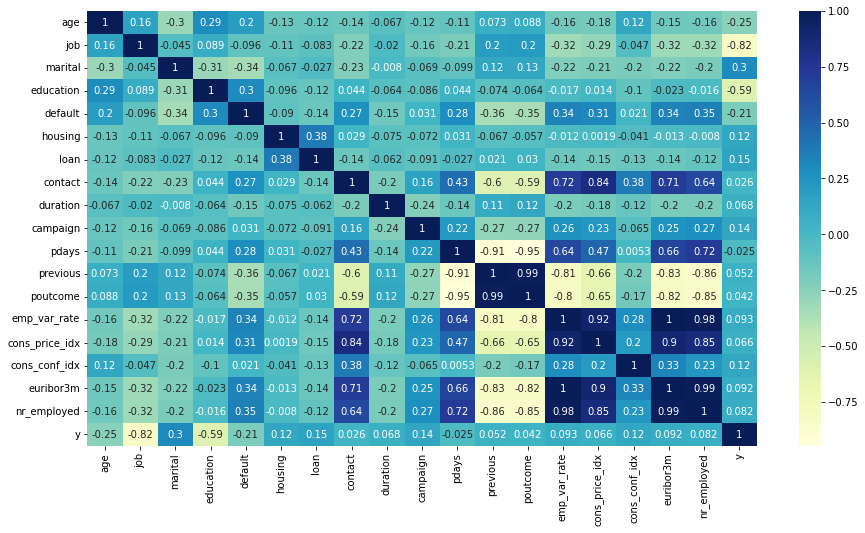

In [222]:
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

### Modelling: Logistic Regression

In [228]:
#Model_Dataframe
model_df = final_data.select(['features','y_Index'])
model_df = model_df.withColumnRenamed("y_Index","label")
model_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)



In [229]:
#Split into training & testing Dataframe
training_df,test_df = model_df.randomSplit([0.75,0.25])

In [230]:
#Create a logistic regression model object
from pyspark.ml.classification import LogisticRegression
log_reg=LogisticRegression().fit(training_df)

In [223]:
#log_reg.save('D:\BAN 5753\model')

In [231]:
lr_summary=log_reg.summary

In [232]:
#Overall accuracy of the classification model
lr_summary.accuracy

0.9111254642338124

In [233]:
#Area under ROC
lr_summary.areaUnderROC

0.9287651045022753

In [234]:
#Precision of both classes
print(lr_summary.precisionByLabel)

[0.928957582478514, 0.6671408250355618]


In [235]:
#Get Preditions
predictions = log_reg.transform(test_df)

In [236]:
predictions.select('label','prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



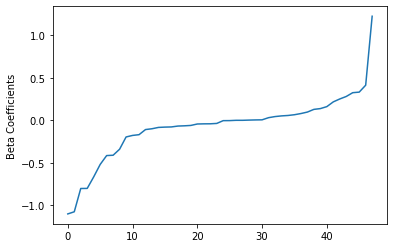

In [303]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(log_reg.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

#### Model Evaluation using AUC 

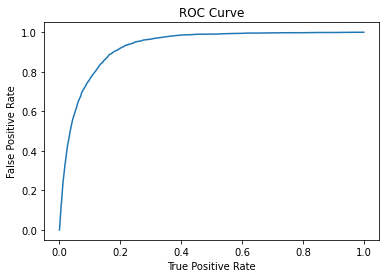

Training set areaUnderROC: 0.9282405567105775


In [304]:
trainingSummary = log_reg.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### Modelling: Decision Tree

In [311]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(training_df)

In [313]:
pred = dtModel.transform(test_df)
pred.show(3)

+--------------------+-----+---------------+--------------------+----------+
|            features|label|  rawPrediction|         probability|prediction|
+--------------------+-----+---------------+--------------------+----------+
|(48,[0,1,2,3,4,5,...|  0.0|[23853.0,692.0]|[0.97180688531269...|       0.0|
|(48,[0,1,2,3,4,5,...|  0.0|[23853.0,692.0]|[0.97180688531269...|       0.0|
|(48,[0,1,2,3,4,5,...|  0.0|[23853.0,692.0]|[0.97180688531269...|       0.0|
+--------------------+-----+---------------+--------------------+----------+
only showing top 3 rows



#### Model Evaluation using Accuracy and Confusion Matrix

In [316]:
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
acc = evaluator.evaluate(pred)
 
print("Prediction Accuracy: ", acc)
 
y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy:  0.9047536052699189
Confusion Matrix:
[[8719  443]
 [ 525  639]]


### Kmeans for clustering consumers

In [318]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(final_data)
data_scale_output=data_scale.transform(final_data)
data_scale_output.show(2)

+---+---------+-------+-----------+-------+-------+----+---------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+--------------+-------+--------------+-------------+-------------+-------------+-------------+-------------+-----------+-------------+-------------+--------------------+--------------------+
|age|      job|marital|  education|default|housing|loan|  contact|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_Index|marital_Index|education_Index|default_Index|housing_Index|loan_Index|contact_Index|poutcome_Index|y_Index|       job_OHE|  marital_OHE|education_OHE|  default_OHE|  housing_OHE|     loan_OHE|contact_OHE| poutcome_OHE|        y_OHE|            features|        standardized|
+---+---------+-------+-----------+-------+-------+----+---------+--------

In [319]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.2195122027629242
Silhouette Score: 0.22106431665550488
Silhouette Score: 0.1695514491249948
Silhouette Score: 0.14816139444226242
Silhouette Score: 0.1280218670426926
Silhouette Score: 0.12962751709387
Silhouette Score: 0.1327392146775022
Silhouette Score: 0.18882988300610948


Text(0, 0.5, 'cost')

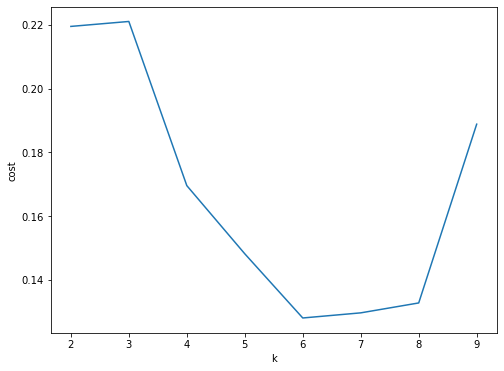

In [320]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel("k")
ax.set_ylabel("cost")